In [37]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import probplot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from patsy import dmatrices

%matplotlib inline
plt.style.use('ggplot')

In [3]:
load_boston()['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
load_boston()['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
boston['MEDV'] = pd.Series(load_boston()['target'])
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Linear Regression

In [11]:
est = smf.ols('MEDV~LSTAT', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        11:17:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
est.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [13]:
est.conf_int().rename(columns={0: '2.5%', 1: '97.5%'})

,2.5%,97.5%
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


In [14]:
X = pd.DataFrame([5, 10, 15], columns=['LSTAT'])
X

,LSTAT
0,5
1,10
2,15


In [15]:
est.get_prediction(X).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


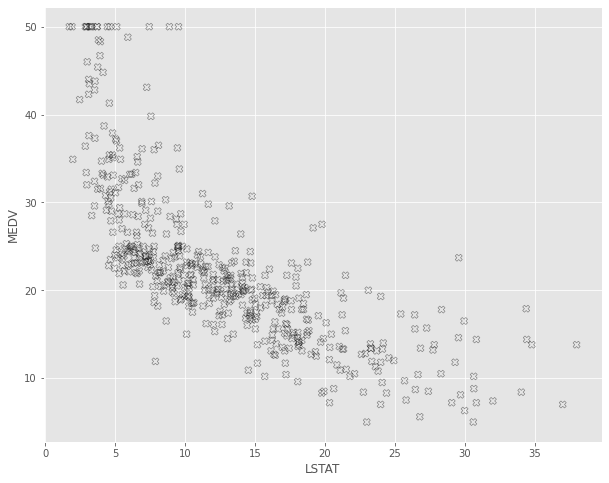

In [16]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='LSTAT', y='MEDV', data=boston, s=50,
                facecolor='none', edgecolor='k', alpha=.5, marker='X')

plt.show()

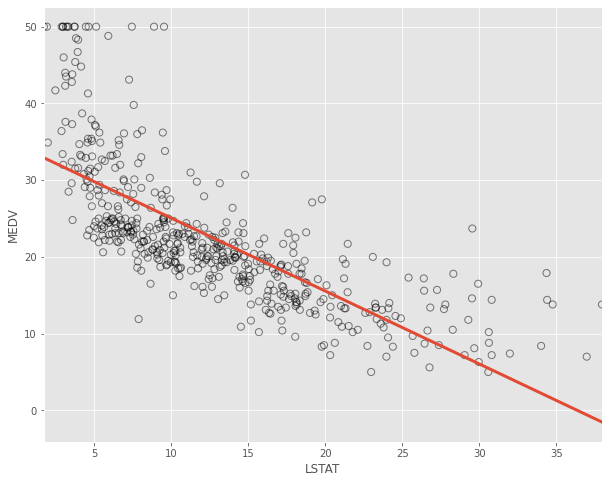

In [17]:
plt.figure(figsize=(10, 8))

sns.regplot(x='LSTAT', y='MEDV', data=boston, ci=None, scatter_kws={
            'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5}, line_kws={'lw': 3})

plt.show()

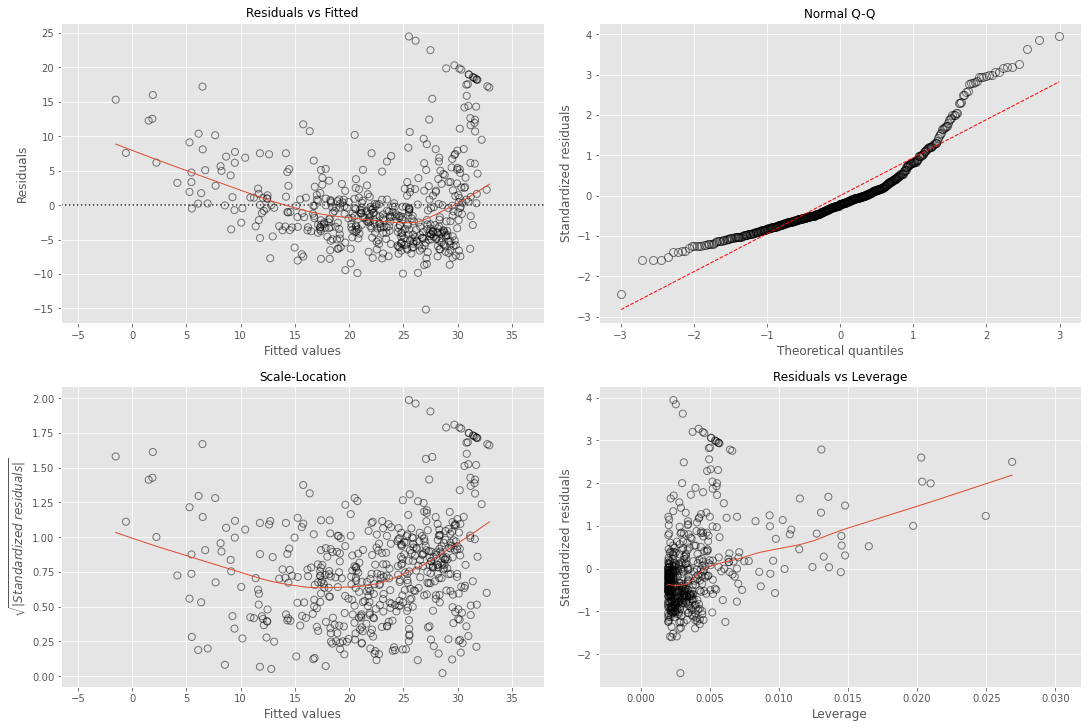

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

sns.residplot(x=est.fittedvalues, y=est.resid, ax=axes[0, 0], lowess=True, scatter_kws={
    'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5}, line_kws={'lw': 1})
axes[0, 0].set_xlabel('Fitted values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residuals vs Fitted', fontsize=12)
axes[0, 0].set_xlim(xmin=est.fittedvalues.min()-5,
                    xmax=est.fittedvalues.max()+5)

influence = est.get_influence()
standardized_residuals = influence.resid_studentized_internal

probplot(standardized_residuals, plot=axes[0, 1])
axes[0, 1].get_lines()[0].set_markerfacecolor('none')
axes[0, 1].get_lines()[0].set_markeredgecolor('k')
axes[0, 1].get_lines()[0].set_alpha(.5)
axes[0, 1].get_lines()[0].set_markersize(8)
axes[0, 1].get_lines()[1].set_lw(1)
axes[0, 1].get_lines()[1].set_linestyle('--')
axes[0, 1].set_ylabel('Standardized residuals', fontsize=12)
axes[0, 1].set_title('Normal Q-Q', fontsize=12)

sns.regplot(x=est.fittedvalues, y=np.sqrt(np.abs(standardized_residuals)), ax=axes[1, 0],
            lowess=True, scatter_kws={'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5},
            line_kws={'lw': 1})
axes[1, 0].set_xlabel('Fitted values', fontsize=12)
axes[1, 0].set_ylabel('$\sqrt{|Standardized \; residuals|}$', fontsize=12)
axes[1, 0].set_title('Scale-Location', fontsize=12)
axes[1, 0].set_xlim(xmin=est.fittedvalues.min()-5,
                    xmax=est.fittedvalues.max()+5)

leverage = influence.hat_matrix_diag

sns.regplot(x=leverage, y=standardized_residuals, ax=axes[1, 1],
            lowess=True, scatter_kws={'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5},
            line_kws={'lw': 1})
axes[1, 1].set_xlabel('Leverage', fontsize=12)
axes[1, 1].set_ylabel('Standardized residuals', fontsize=12)
axes[1, 1].set_title('Residuals vs Leverage', fontsize=12)
axes[1, 1].set_xlim(xmin=leverage.min()-.005,
                    xmax=leverage.max()+.005)

plt.show()

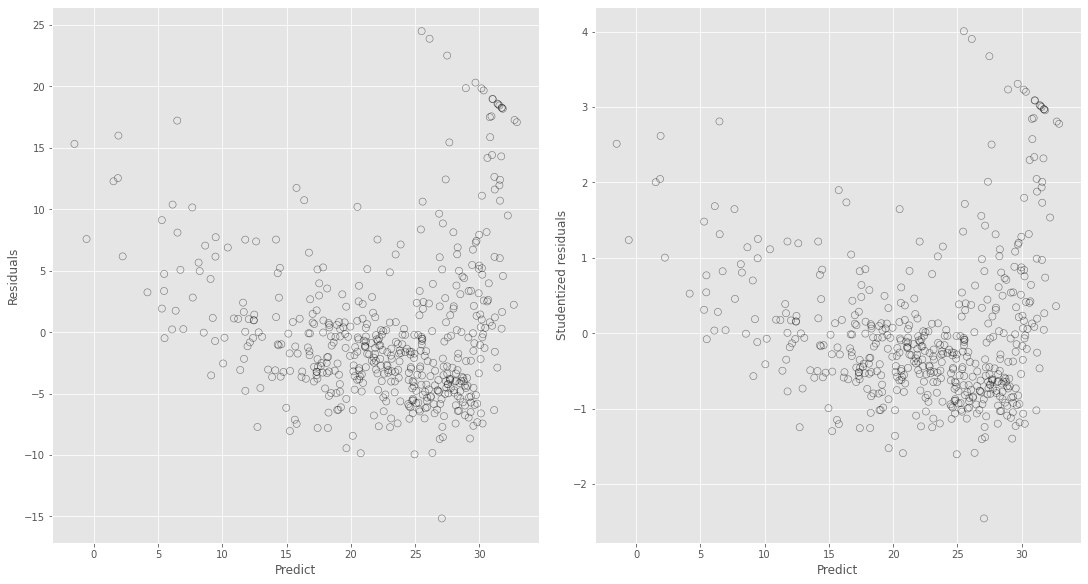

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

sns.scatterplot(x=est.predict(boston['LSTAT']), y=est.resid, data=boston, s=50,
                facecolor='none', edgecolor='k', alpha=.5, ax=axes[0])
sns.scatterplot(x=est.predict(boston['LSTAT']), y=influence.resid_studentized_external, data=boston, s=50,
                facecolor='none', edgecolor='k', alpha=.5, ax=axes[1])

ylabel = iter(('Residuals', 'Studentized residuals'))
for ax in axes:
    ax.set_xlabel('Predict', fontsize=12)
    ax.set_ylabel(next(ylabel), fontsize=12)
    
plt.show()

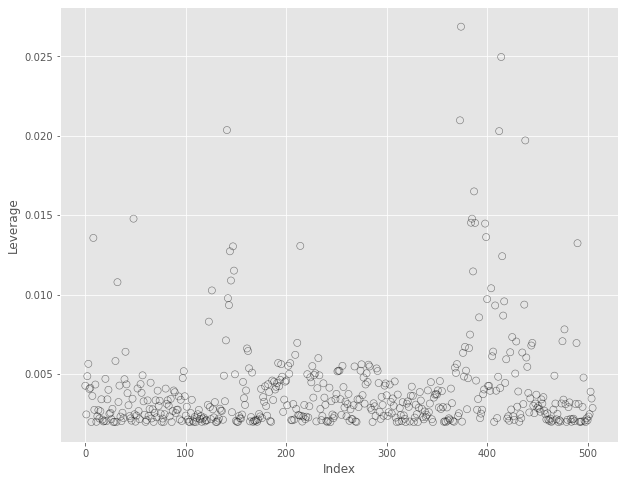

In [20]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=range(len(leverage)), y=leverage, s=50,
                facecolor='none', edgecolor='k', alpha=.5)

plt.xlabel('Index', fontsize=12)
plt.ylabel('Leverage', fontsize=12)

plt.show()

In [21]:
leverage.argmax()

374

# Multiple Linear Regression

In [22]:
est = smf.ols('MEDV ~ LSTAT + AGE', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           2.98e-88
Time:                        11:21:33   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
est = smf.ols('MEDV ~ ' + '+'.join(boston.drop('MEDV', axis=1).columns), boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        11:21:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
print('R2:', est.rsquared)

R2: 0.7406426641094095


In [25]:
pred = est.predict(boston.drop('MEDV', axis=1))
RSS = ((boston['MEDV']-pred)**2).sum()
RSE = (RSS/(boston.shape[0]-2))**.5

print('RSE:', RSE)

RSE: 4.68846621321412


In [27]:
y, X = dmatrices('MEDV ~ ' + '+'.join(boston.drop('MEDV', axis=1).columns), data=boston, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,585.265238,Intercept
1,1.792192,CRIM
2,2.298758,ZN
3,3.991596,INDUS
4,1.073995,CHAS
5,4.393720,NOX
6,1.933744,RM
7,3.100826,AGE
8,3.955945,DIS
9,7.484496,RAD


In [28]:
est = smf.ols('MEDV ~ ' + '+'.join(boston.drop(['MEDV', 'AGE'], axis=1).columns), boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          6.08e-136
Time:                        11:22:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
est = smf.ols('MEDV~LSTAT*AGE', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           4.86e-88
Time:                        11:23:16   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
estQ = smf.ols('MEDV ~ LSTAT + np.square(LSTAT)', boston).fit()
estQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.56e-112
Time:                        11:24:02   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(LSTAT)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
estL = smf.ols('MEDV ~ LSTAT', boston).fit()
sm.stats.anova_lm(estL, estQ)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


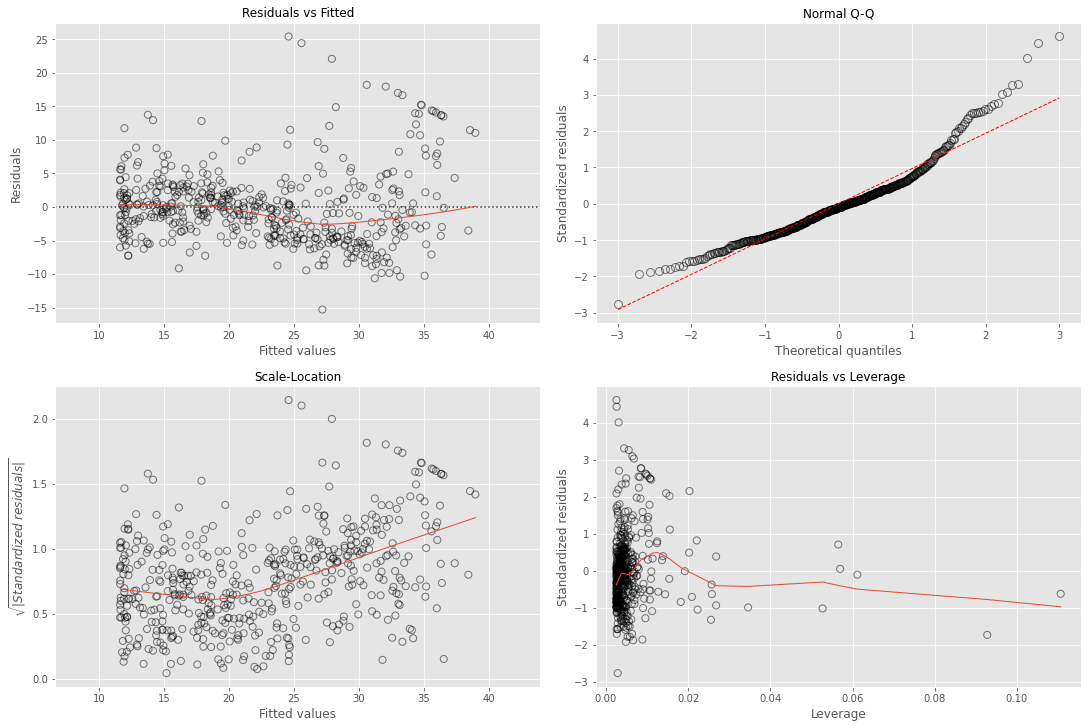

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

sns.residplot(x=estQ.fittedvalues, y=estQ.resid, ax=axes[0, 0], lowess=True, scatter_kws={
    'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5}, line_kws={'lw': 1})
axes[0, 0].set_xlabel('Fitted values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residuals vs Fitted', fontsize=12)
axes[0, 0].set_xlim(xmin=estQ.fittedvalues.min()-5,
                    xmax=estQ.fittedvalues.max()+5)

influence = estQ.get_influence()
standardized_residuals = influence.resid_studentized_internal

probplot(standardized_residuals, plot=axes[0, 1])
axes[0, 1].get_lines()[0].set_markerfacecolor('none')
axes[0, 1].get_lines()[0].set_markeredgecolor('k')
axes[0, 1].get_lines()[0].set_alpha(.5)
axes[0, 1].get_lines()[0].set_markersize(8)
axes[0, 1].get_lines()[1].set_lw(1)
axes[0, 1].get_lines()[1].set_linestyle('--')
axes[0, 1].set_ylabel('Standardized residuals', fontsize=12)
axes[0, 1].set_title('Normal Q-Q', fontsize=12)

sns.regplot(x=estQ.fittedvalues, y=np.sqrt(np.abs(standardized_residuals)), ax=axes[1, 0],
            lowess=True, scatter_kws={'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5},
            line_kws={'lw': 1})
axes[1, 0].set_xlabel('Fitted values', fontsize=12)
axes[1, 0].set_ylabel('$\sqrt{|Standardized \; residuals|}$', fontsize=12)
axes[1, 0].set_title('Scale-Location', fontsize=12)
axes[1, 0].set_xlim(xmin=estQ.fittedvalues.min()-5,
                    xmax=estQ.fittedvalues.max()+5)

leverage = influence.hat_matrix_diag

sns.regplot(x=leverage, y=standardized_residuals, ax=axes[1, 1],
            lowess=True, scatter_kws={'facecolor': 'none', 'edgecolor': 'k', 's': 50, 'alpha': .5},
            line_kws={'lw': 1})
axes[1, 1].set_xlabel('Leverage', fontsize=12)
axes[1, 1].set_ylabel('Standardized residuals', fontsize=12)
axes[1, 1].set_title('Residuals vs Leverage', fontsize=12)
axes[1, 1].set_xlim(xmin=leverage.min()-.005,
                    xmax=leverage.max()+.005)

plt.show()

In [35]:
est = smf.ols(
    'MEDV ~ ' + '+'.join(['np.power(LSTAT, ' + str(i) + ')' for i in range(1, 6)]), boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          8.73e-122
Time:                        11:25:03   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(LSTAT, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(LSTAT, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(LSTAT, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(LSTAT, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(LSTAT, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
poly = PolynomialFeatures(5).fit_transform(
    boston['LSTAT'].values.reshape(-1, 1))

est = sm.OLS(boston['MEDV'], poly).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          8.73e-122
Time:                        11:26:00   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.000      60.618      74.781
x1           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
x2             1.2728      0.223      5.703      0.000       0.834       1.711
x3            -0.0683      0.014     -4.747      0.000      -0.097      -0.040
x4             0.0017      0.000      4.143      0.000       0.001       0.003
x5         -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
est = smf.ols('MEDV ~ np.log(RM)', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.22e-64
Time:                        11:26:16   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(RM)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
carseats = pd.read_csv('.\Downloads\Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [41]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [42]:
est = smf.ols('Sales ~ Income:Advertising + Price:Age+' +
              '+'.join(carseats.drop('Sales', axis=1).columns), carseats).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          6.14e-166
Time:                        11:27:04   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""